# RED WINE QUALITY.

In [3]:
!pip install matplotlib
!pip install seaborn
!pip install missingno
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

In [4]:
import pandas as pd
import os

In [5]:
pwd

'C:\\Users\\Ayush'

In [36]:
df = pd.read_csv(r"C:\Users\Ayush\Downloads\winequality-red.csv" , encoding='ISO-8859-1')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.shape

(1599, 12)

In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<AxesSubplot:>

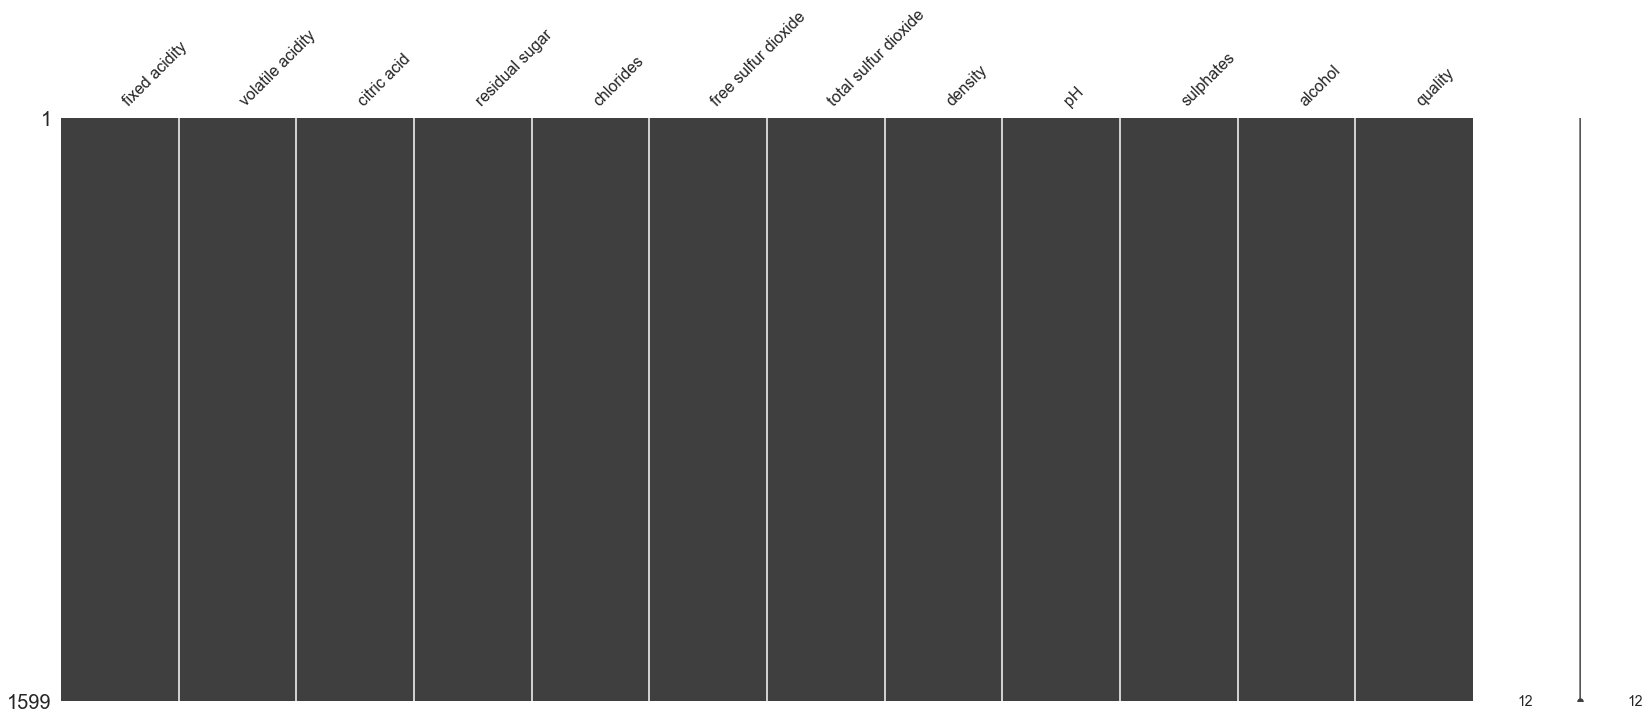

In [10]:
msno.matrix(df)  # just to visualize. no missing values.

### Now we can move to Univariate Analysis

In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


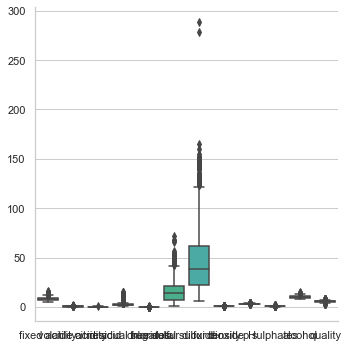

In [12]:
sns.factorplot(data=df,kind='box')

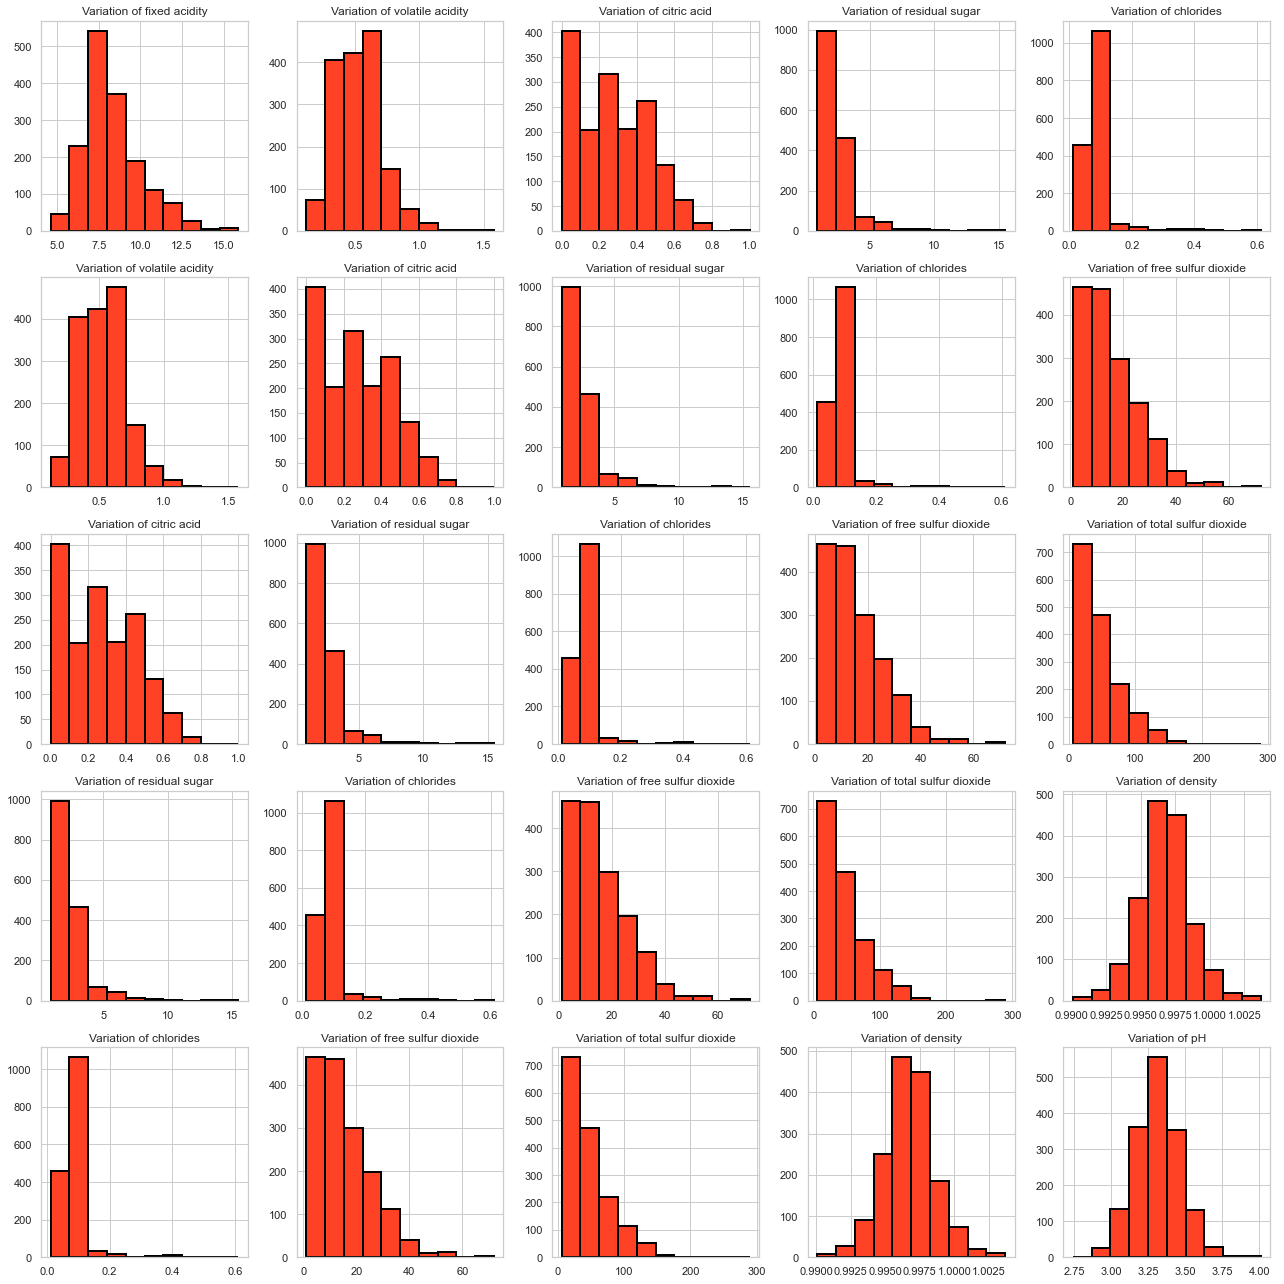

In [13]:
fig,axes = plt.subplots(5,5)
columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
for i in range (5):
    for j in range (5):
        axes[i,j].hist(x=columns[i+j],data=df,edgecolor='#000000',linewidth=2,color='#ff4125')
        axes[i,j].set_title('Variation of '+columns[i+j])
fig=plt.gcf()
fig.set_size_inches(18,18)
fig.tight_layout()


## CORELATION MAP.

<AxesSubplot:>

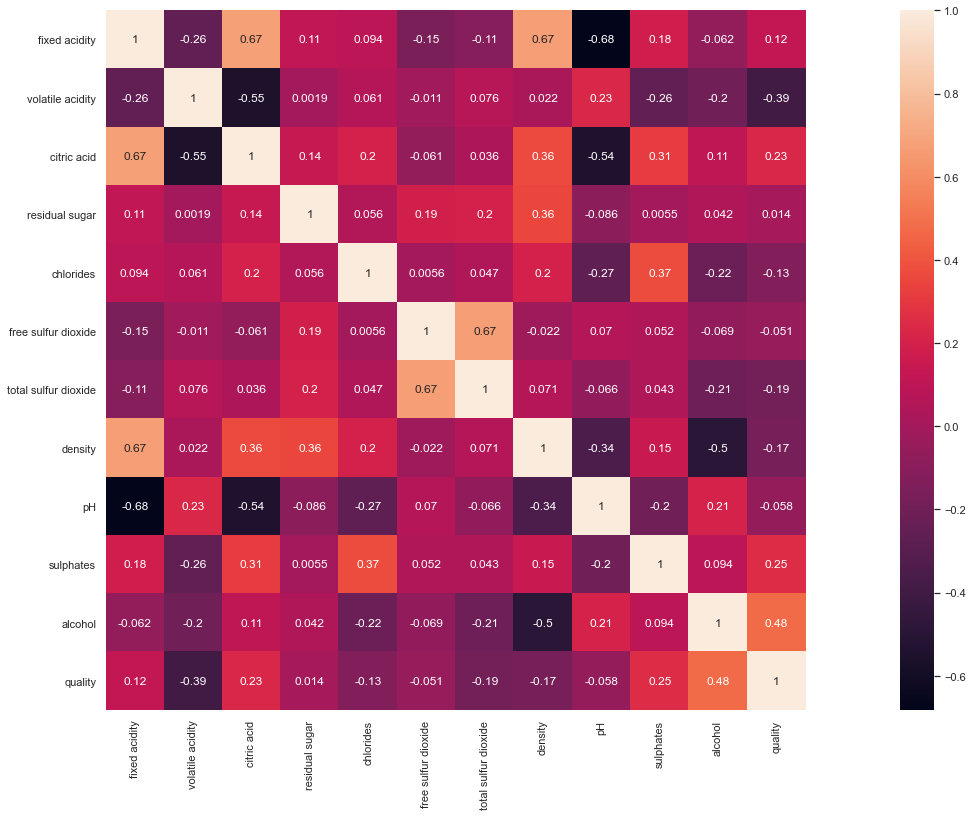

In [14]:
corr_mat=df.corr()
mask=np.array(corr_mat)
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=corr_mat,annot=True,cbar=True,square=True)

### INFERENCES FROM THE ABOVE HEAT MAP--
1.The quality of wine is highly related to volatile acidity.

2.Also the quality of wine is highly corelated to alcohol

3.pH and citric acid/ fixed acidity are highly inversely related as all of us know that acids have smaller pH values.

4.Self Relation ie of a fetaure to itself is 1 as expected.

5.Some other similar inferences can be drawn.

##### NOW WE CAN VISUALIZE HOW QUALITY(ie Target) VARIES WITH DIFFERENT NUMERIC FEATURES.

In [15]:
def plot(feature_x,target='quality'):
    sns.factorplot(x=target,y=feature_x,data=df,kind='bar',size=5,aspect=1)
    sns.factorplot(x=target,y=feature_x,data=df,kind='violin',size=5,aspect=1)
    sns.factorplot(x=target,y=feature_x,data=df,kind='swarm',size=5,aspect=1)
    

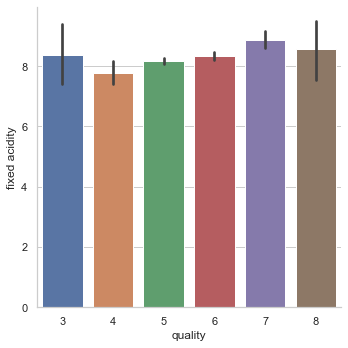

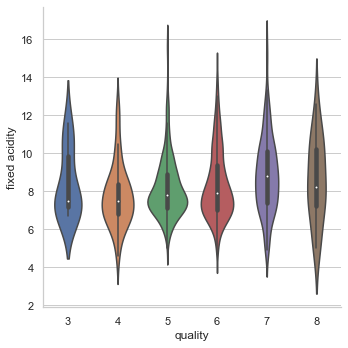

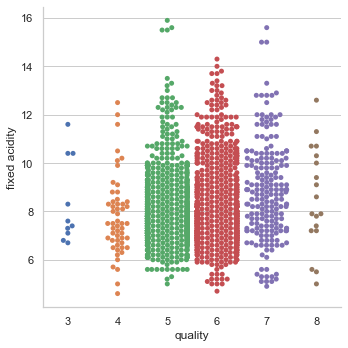

In [16]:
# for fixed acidity.
plot('fixed acidity','quality')

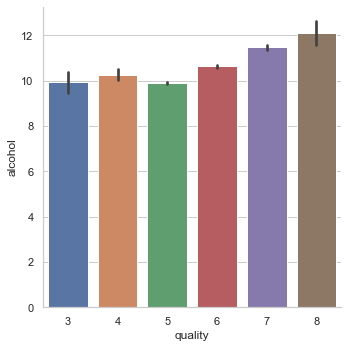

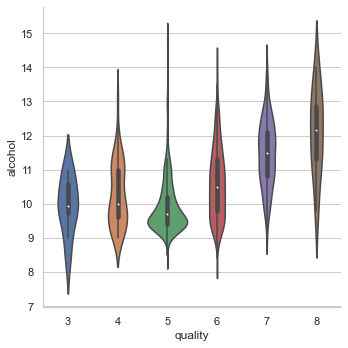

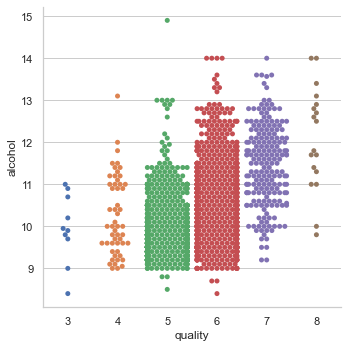

In [17]:
# for alcohol.
plot('alcohol','quality')

### similarly for other variables.

In [37]:
lb = LabelEncoder()

In [38]:
df['quality']=lb.fit_transform(df['quality'])

In [39]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('quality',axis=1),df['quality'],test_size=0.25,random_state=42)

In [40]:
models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
       DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]

model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc}
d


{'Modelling Algo': ['LogisticRegression',
  'LinearSVM',
  'rbfSVM',
  'KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'GaussianNB'],
 'Accuracy': [0.5475, 0.44, 0.51, 0.4675, 0.655, 0.5925, 0.635, 0.5525]}

In [41]:
acc_frame=pd.DataFrame(d)
acc_frame

,Modelling Algo,Accuracy
0,LogisticRegression,0.5475
1,LinearSVM,0.4400
2,rbfSVM,0.5100
3,KNearestNeighbors,0.4675
4,RandomForestClassifier,0.6550
5,DecisionTree,0.5925
6,GradientBoostingClassifier,0.6350
7,GaussianNB,0.5525


<AxesSubplot:xlabel='Modelling Algo', ylabel='Accuracy'>

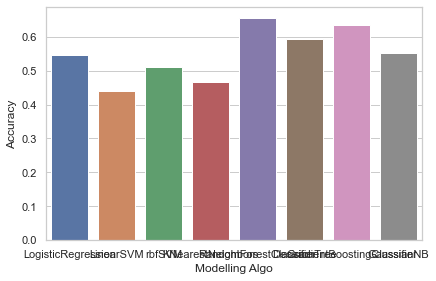

In [42]:
sns.barplot(x='Modelling Algo', y='Accuracy',data=acc_frame)


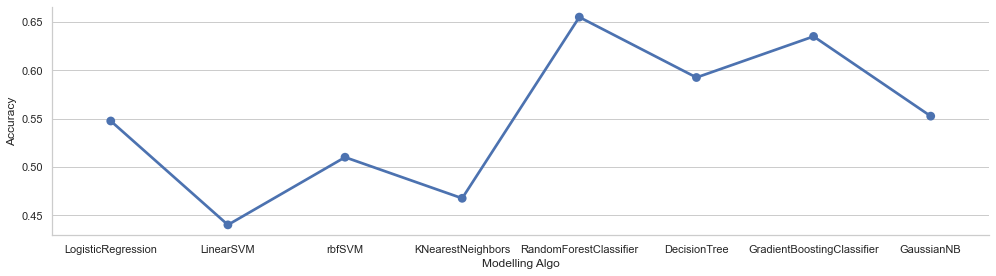

In [43]:
sns.factorplot(x='Modelling Algo',y='Accuracy',data=acc_frame,kind='point',size=4,aspect=3.5)


### NOTE THAT THIS IS WITHOUT FEATURE SCALING. NOW SINCE FEATURES HAVE DIFFERENT SCALES LET US TRY TO DO FEATURE SCALING AND SEE THE IMPACT.

In [44]:
def func(x_train,x_test,y_train,y_test,name_scaler):
    models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
    acc_sc=[]
    for model in range(len(models)):
        clf=models[model]
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        acc_sc.append(accuracy_score(pred,y_test))
        
    acc_frame[name_scaler]=np.array(acc_sc)
    
        

In [46]:
scalers= [MinMaxScaler(),StandardScaler()]
names=['Acc_Min_Max_Scaler','Acc_Standard_Scaler']
for scale in range(len(scalers)):
    scaler=scalers[scale]
    scaler.fit(df)
    scaled_df=scaler.transform(df)
    X=scaled_df[:,0:11]
    Y=df['quality']
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
    func(x_train,x_test,y_train,y_test,names[scale])
    

In [47]:
acc_frame

,Modelling Algo,Accuracy,Acc_Min_Max_Scaler,Acc_Standard_Scaler
0,LogisticRegression,0.5475,0.5575,0.5875
1,LinearSVM,0.4400,0.5575,0.5700
2,rbfSVM,0.5100,0.6100,0.6300
3,KNearestNeighbors,0.4675,0.5525,0.5750
4,RandomForestClassifier,0.6550,0.6725,0.6625
5,DecisionTree,0.5925,0.5825,0.5950
6,GradientBoostingClassifier,0.6350,0.6325,0.6425
7,GaussianNB,0.5525,0.5450,0.5450


### NOW THIS CLEARLY SHOWS THE ACCUARCIES OF DIFFERENT MODELLING ALGOS ON USING DIFFERENT SCALERS.

1. Note that here the accuracies increase marginally on scaling.

2. Also for this data, StandardScaling seems to give slightly better results than the MinMaxScaling.

3. For some modelling algos there is a considerable increase in accuracies upon scaling the features like SVM, KNN wheras for others there isn't a considerable increase in accuracies upon scaling.

<AxesSubplot:xlabel='Accuracy', ylabel='Modelling Algo'>

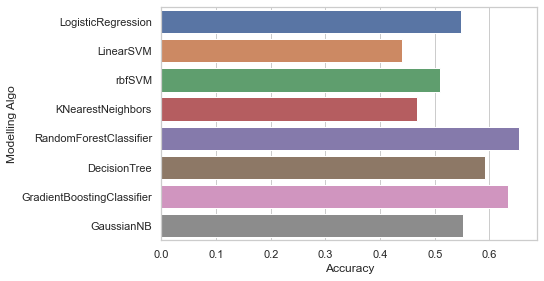

In [48]:
# just to visualize the accuracies.
sns.barplot(y='Modelling Algo',x='Accuracy',data=acc_frame)

<AxesSubplot:xlabel='Acc_Min_Max_Scaler', ylabel='Modelling Algo'>

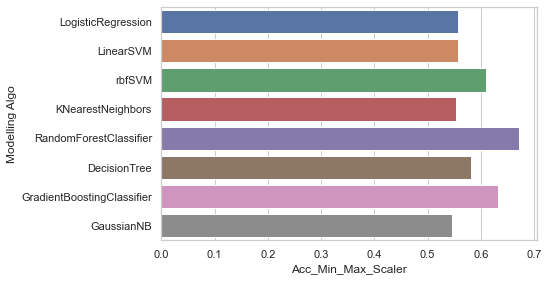

In [49]:
sns.barplot(y='Modelling Algo',x='Acc_Min_Max_Scaler',data=acc_frame)

<AxesSubplot:xlabel='Acc_Standard_Scaler', ylabel='Modelling Algo'>

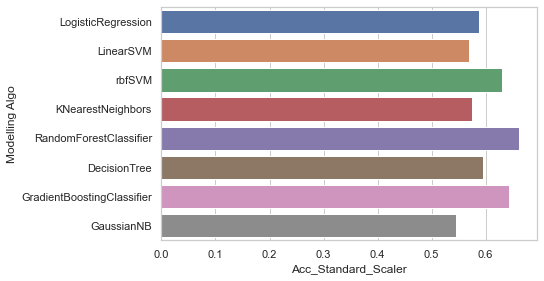

In [50]:
sns.barplot(y='Modelling Algo',x='Acc_Standard_Scaler',data=acc_frame)

In [54]:
# preparing the features by using a StandardScaler as it gave better resluts.
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df)
X=scaled_df[:,0:11]
Y=df['quality']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

## **PARAMETER TUNING USING GridSearchCV.

### 1.LOGISTIC REGRESSION

In [78]:
params_dict={'C':[0.001,0.01,0.1,1,10,100,1000], 'penalty':['l1','l2']}
model=GridSearchCV(estimator=LogisticRegression(),param_grid=params_dict,scoring='accuracy',cv=5)
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [79]:
model.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [80]:
model.best_score_

0.5980509065550906

In [81]:
pred=model.predict(x_test)
accuracy_score(pred,y_test)

0.5825

### 2. KNN

In [82]:
l=[i+1 for i in range(50)]
params_dict={'n_neighbors':l,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_knn.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_jobs': [-1],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [84]:
clf_knn.best_params_

{'n_jobs': -1, 'n_neighbors': 1}

In [85]:
clf_knn.best_score_

0.6230182072829132

In [86]:
pred=clf_knn.predict(x_test)
accuracy_score(pred,y_test)

0.61

### 3.SUPPORT VECTOR MACHINE (SVM)

In [90]:
params_dict={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100],'kernel':['linear','rbf']}
clf_svc=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_svc.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [94]:
clf_svc.best_score_

0.6656022408963586

In [95]:
clf_svc.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [96]:
# now tuning finally around these values of C and gamma and the kernel for 
#further increasing the accuracy.

params_dict={'C':[0.90,0.92,0.96,0.98,1.0,1.2,1.5],'gamma':[0.90,0.92,0.96,0.98,1.0,1.2,1.5],'kernel':['linear','rbf']}
clf_svm=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_svm.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.9, 0.92, 0.96, 0.98, 1.0, 1.2, 1.5],
                         'gamma': [0.9, 0.92, 0.96, 0.98, 1.0, 1.2, 1.5],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [97]:
clf_svm.best_score_

0.6747689075630252

In [98]:
clf_svm.best_params_

{'C': 1.5, 'gamma': 0.98, 'kernel': 'rbf'}

In [102]:
pred=clf_svm.predict(x_test)
accuracy_score(pred,y_test)

0.655

#### HENCE TILL NOW THE BEST ACCURACY IS GIVEN BY SVM WITH rbf KERNEL WITH  C=1.5 and gamma=0.98 .

## 4. RANDOM FOREST

In [106]:
params_dict={'n_estimators':[500],'max_features':['auto','sqrt','log2']}
clf_rf= GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),param_grid=params_dict,
                     scoring='accuracy',cv=10)
clf_rf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [500]},
             scoring='accuracy')

In [107]:
clf_rf.best_score_

0.7023179271708684

In [108]:
clf_rf.best_params_

{'max_features': 'auto', 'n_estimators': 500}

In [109]:
pred=clf_rf.predict(x_test)
accuracy_score(pred,y_test)

0.665

## 5. GRADIENT BOOSTING

In [110]:
clf_gb=GridSearchCV(estimator=GradientBoostingClassifier(),cv=10,param_grid=
                    dict({'n_estimators':[500]}))
clf_gb.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [500]})

In [111]:
clf_gb.best_score_

0.6597619047619048

In [112]:
clf_gb.best_params_

{'n_estimators': 500}

In [113]:
pred=clf_rf.predict(x_test)
accuracy_score(pred,y_test)

0.665

## 6. DECISION TREE

In [121]:
clf_dt=GridSearchCV(estimator=DecisionTreeClassifier(),
                    scoring='accuracy',cv=10,param_grid=dict({'max_depth':[3]}))
clf_dt.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3]}, scoring='accuracy')

In [118]:
clf_dt.best_score_

0.5571218487394958

In [119]:
clf_dt.best_params_

{'max_depth': 3}

In [120]:
pred=clf_dt.predict(x_test)
accuracy_score(pred,y_test)

0.525

### HENCE ON GIVEN PARAMETER TUNING THE SVM WITH Random Forest and Grid Search  GIVES APPROX THE SAME AND HIGHEST ACCURACY OF 66.5%